In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_excel('/Users/tina/Downloads/3종 데이터/종합파일.xlsx', index_col=0)
df1
df1=df1[['날짜','종가']]


In [2]:
df1

,날짜,종가
0,1983-03-31,29.27
1,1983-04-04,29.44
2,1983-04-05,29.71
3,1983-04-06,29.90
4,1983-04-07,30.17
...,...,...
9928,2022-05-18,109.59
9929,2022-05-19,112.21
9930,2022-05-20,113.23
9931,2022-05-22,110.31


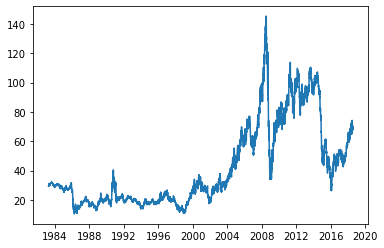

In [5]:
train = df1.iloc[:-1000]
plt.plot(train['날짜'], train['종가'])
plt.show()

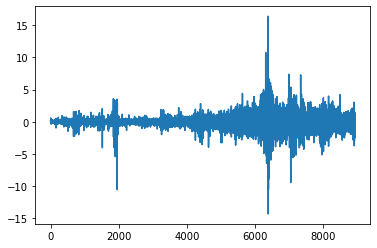

In [6]:
diff_1=train['종가'].diff().dropna()
plt.plot(diff_1)
plt.show()

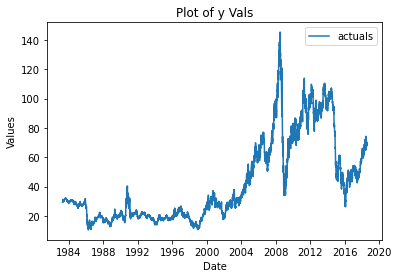

In [11]:
from scalecast.Forecaster import Forecaster
f=Forecaster(y=train['종가'], current_dates=train['날짜'])
f.plot()

In [8]:
pip install scalecast==0.1.8

  Using cached SCALECAST-0.1.8.tar.gz (7.9 MB)
  Using cached eli5-0.13.0.tar.gz (216 kB)
  Using cached xgboost-1.6.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.7 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     |████████████████████████████████| 46 kB 5.4 MB/s eta 0:00:011
  Created wheel for scalecast: filename=SCALECAST-0.1.8-py3-none-any.whl size=15575 sha256=eef08597a211102fa0f8f12c424bfd01f88a9cbd376e0a6382c3ca6f6559ac7a
  Stored in directory: /Users/tina/Library/Caches/pip/wheels/9f/3e/40/2c85d7d96a1e7e16ef01d94cd90f2c93330deb866c4bd850ce
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d58a53cc56bebf5cd6daf3199ac79c1d33bd29d895bd0c93964d137d971a55e0
  Stored in directory: /Users/tina/Library/Caches/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling 

In [10]:
pip install pandas-datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


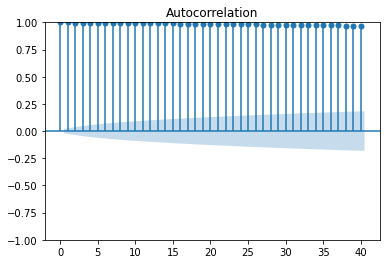

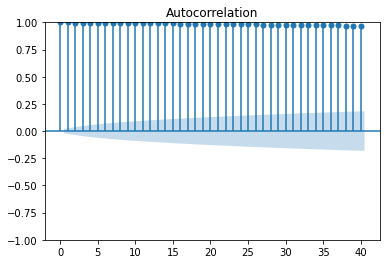

In [12]:
f.plot_acf()

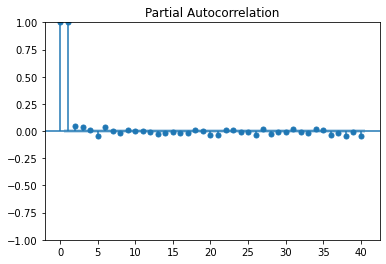

In [13]:
f.plot_pacf()
plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=SARIMA(train['종가'], order=(0,1,5))
model_fit=model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

NameError: name 'SARIMA' is not defined

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=ARIMA(train['종가'], order=(0,1,5))
model_fit=model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


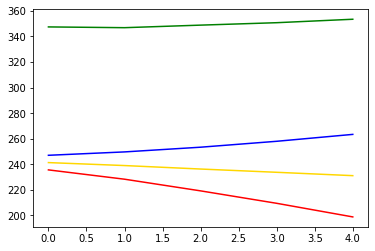

In [66]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.

zoo_test_df = pd.read_excel("/Users/tina/Desktop/기계/R 3종 데이터/S&P 500/1번데이터_test.xlsx", index_col=0,names=['ds', 'y'])

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. 
test_y = zoo_test_df.y.values # 실제 5일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 
plt.plot(test_y, color="green") # 실제 
 

In [67]:
pred_y

[241.32465647005046,
 239.00805149182003,
 236.28747252089195,
 233.7371119963625,
 231.11502824207543]

In [68]:
test_y

array([347.4, 346.8, 348.8, 350.7, 353.4])

## ARIMA가 아닌, 페이스북이 만든 시계열 예측 라이브러리


In [69]:
conda install -c conda-forge fbprophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.
